## Assignment 7

#### Roll No : 21BCP446D

In [16]:
from keras.utils import to_categorical
from keras_preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
from PIL import Image

In [6]:
vehicles_folder = 'C:/Users/Lenovo/Desktop/data/vehicles'
non_vehicles_folder = 'C:/Users/Lenovo/Desktop/data/non-vehicles'

vehicle_images = [os.path.join(vehicles_folder, img) for img in os.listdir(vehicles_folder)]
non_vehicle_images = [os.path.join(non_vehicles_folder, img) for img in os.listdir(non_vehicles_folder)]

vehicle_labels = np.ones(len(vehicle_images))
non_vehicle_labels = np.zeros(len(non_vehicle_images))

data = vehicle_images + non_vehicle_images
labels = np.concatenate([vehicle_labels, non_vehicle_labels])

X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

In [18]:
def resize_images(image_paths, new_size):
    resized_images = []
    for img_path in image_paths:
        img = Image.open(img_path)
        resized_img = img.resize(new_size)
        resized_images.append(resized_img)
    return resized_images

new_size = (64, 64)

# Resize images in X_train
X_train_resized = resize_images(X_train, new_size)

# Resize images in X_test
X_test_resized = resize_images(X_test, new_size)

In [20]:
def images_to_array(images):
    array_images = []
    for img in images:
        array_images.append(np.array(img))
    return np.array(array_images)

# Convert resized images in X_train_resized to numpy array
X_train_array = images_to_array(X_train_resized)

# Convert resized images in X_test_resized to numpy array
X_test_array = images_to_array(X_test_resized)

In [35]:
model = models.Sequential([
    
    layers.Conv2D(16,(2,2),activation='relu',input_shape=(64,64,3)),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(32,(2,2),activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(64,(2,2),activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(128,(2,2),activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(64,activation='relu'),
    layers.Dense(1,activation='sigmoid'),
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [36]:
history = model.fit(X_train_array,y_train,epochs=10,validation_split=0.25)

Epoch 1/10
333/333 [==============================] - 6s 16ms/step - loss: 0.2337 - accuracy: 0.9158 - val_loss: 0.0506 - val_accuracy: 0.9840
Epoch 2/10
333/333 [==============================] - 5s 16ms/step - loss: 0.0548 - accuracy: 0.9822 - val_loss: 0.0335 - val_accuracy: 0.9913
Epoch 3/10
333/333 [==============================] - 6s 17ms/step - loss: 0.0398 - accuracy: 0.9866 - val_loss: 0.0235 - val_accuracy: 0.9935
Epoch 4/10
333/333 [==============================] - 5s 16ms/step - loss: 0.0336 - accuracy: 0.9886 - val_loss: 0.0401 - val_accuracy: 0.9851
Epoch 5/10
333/333 [==============================] - 5s 16ms/step - loss: 0.0317 - accuracy: 0.9903 - val_loss: 0.0281 - val_accuracy: 0.9893
Epoch 6/10
333/333 [==============================] - 5s 16ms/step - loss: 0.0241 - accuracy: 0.9919 - val_loss: 0.0252 - val_accuracy: 0.9935
Epoch 7/10
333/333 [==============================] - 6s 18ms/step - loss: 0.0195 - accuracy: 0.9941 - val_loss: 0.0117 - val_accuracy: 0.9961

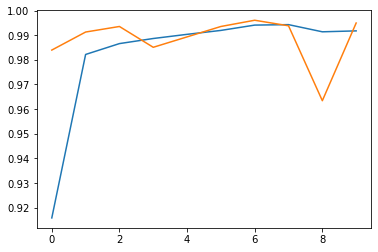

In [37]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

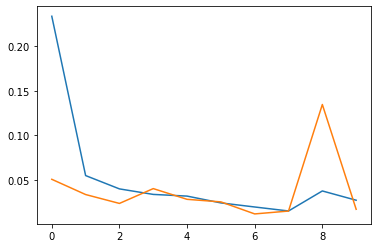

In [38]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [39]:
Y_PRED = model.predict(X_test_array)

111/111 [==============================] - 1s 6ms/step


In [42]:
Y_PRED = np.round(Y_PRED)
accuracy_score(Y_PRED, y_test)

0.9901463963963963